In [6]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

import cmbo
from IPython.display import display

from plot_cluster import *
from score_individual_objects import *

%load_ext autoreload
%autoreload 2

COLORS = [
    "#25ced1",  # robin-egg-blue
    "#ef476f",  # bright-pink-crayola
    "#731dd8",  # french-violet
    "#522b29",  # caput-mortuum
    "#157f1f",  # office-green
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
cfg = cmbo.utils.load_config("/Users/rstiskalek/Projects/CMBOlympics/scripts/config.toml")
obs_clusters = cmbo.io.load_observed_clusters(cfg['paths']['observed_clusters'])


In [8]:
from cmbo.utils import load_associations

associations_cb1 = load_associations("csiborg1", cfg)
matches_cb1 = attach_associations_to_obs_clusters(obs_clusters,
associations_cb1, cfg)
boxsize_cb1 = associations_cb1[0].optional_data["box_size"]

associations_cb2 = load_associations("csiborg2", cfg)
matches_cb2 = attach_associations_to_obs_clusters(obs_clusters,
associations_cb2, cfg)
boxsize_cb2 = associations_cb2[0].optional_data["box_size"]

associations_manti = load_associations("manticore", cfg)
matches_manti = attach_associations_to_obs_clusters(obs_clusters,
associations_manti, cfg)
boxsize_manti = associations_manti[0].optional_data["box_size"]

Loaded 101 simulation realisations.
Identified 126 halo associations.
Halo signal datasets were not found in run_suite output.
Using 19 observed clusters.


100%|██████████| 126/126 [00:01<00:00, 69.31it/s]


Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=6.826e-02)
Cluster 8 (Hercules (A2147)) now orphaned (best remaining p=2.100e-01)
Loaded 20 simulation realisations.
Identified 194 halo associations.
Halo signal datasets were not found in run_suite output.
Using 19 observed clusters.


100%|██████████| 194/194 [00:03<00:00, 64.09it/s]


Perseus (A426): min p-value = 1.000e+00
Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=1.053e-01)
Cluster 18 (Perseus (A426)) now orphaned (best remaining p=1.000e+00)
Loaded 50 simulation realisations.
Identified 178 halo associations.
Halo signal datasets were not found in run_suite output.
Using 19 observed clusters.


100%|██████████| 178/178 [00:02<00:00, 79.54it/s]

Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=8.155e-02)


In [4]:
# print_cluster_scores(cfg, matches_cb2, obs_clusters,)

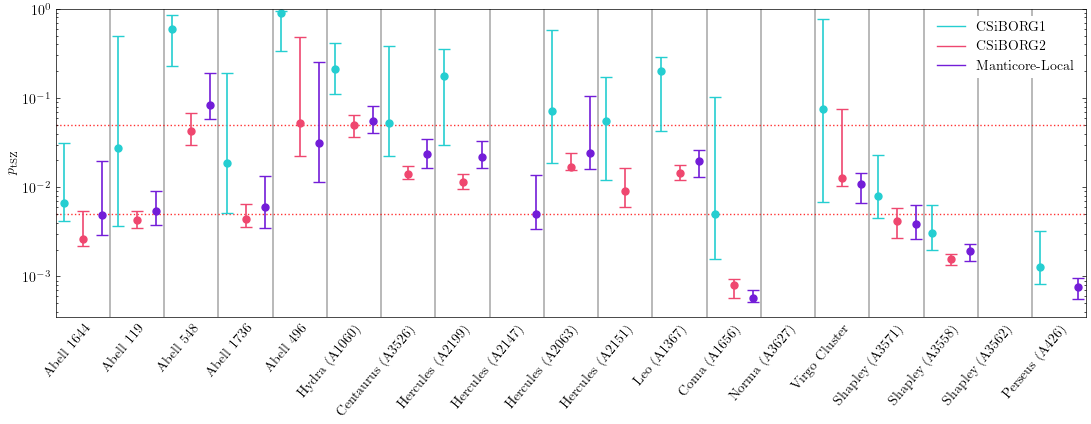

In [9]:
fig, ax = plot_cluster_pvalue_percentiles(
    cfg, [matches_cb1, matches_cb2, matches_manti], obs_clusters,
    suite_labels=["CSiBORG1", "CSiBORG2", "Manticore-Local"],
    suite_colors=COLORS,
    )
fig.savefig("/Users/rstiskalek/Downloads/cluster_pvalue_violins.png", dpi=300, bbox_inches="tight")

display(fig)

In [ ]:
fig, ax = plot_pfeifer_vs_tsz(matches_manti)
display(fig)

In [81]:
# LFI_mask =cmbo.io.read_Planck_comptonSZ("/Users/rstiskalek/Downloads/LFI_inpainting_bool.fits", 'T')
# LFI_mask =LFI_mask.flatten()

# HFI_mask =cmbo.io.read_Planck_comptonSZ("/Users/rstiskalek/Downloads/HFI_inpainting_bool.fits", 'T')
# HFI_mask =HFI_mask.flatten()
# tot_mask = LFI_mask * HFI_mask


fname_mask = "/Users/rstiskalek/Projects/CMBOlympics/data/PR4_NILC_y_map_MASK.fits"

mask = cmbo.io.read_Planck_comptonSZ(fname_mask, which="GAL-MASK")
mask *= cmbo.io.read_Planck_comptonSZ(fname_mask, which="NILC-MASK")
mask *= cmbo.io.read_Planck_comptonSZ(fname_mask, which="PS-MASK")

In [82]:
# fname_cmb = "/Users/rstiskalek/Projects/CMBOlympics/data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits"
# fname_cmb = cfg["input_map"]["signal_map"]
fname_cmb = "/Users/rstiskalek/Projects/CMBOlympics/data/PR4_NILC_y_map.fits"

cmb_tsz = cmbo.io.read_Planck_comptonSZ(fname_cmb, which="FULL")

cmb_tsz[mask == 0] = np.nan
# cmb_tsz = cmbo.utils.smooth_map_gaussian(cmb_tsz, fwhm_arcmin=9.6, )
profiler2d = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)


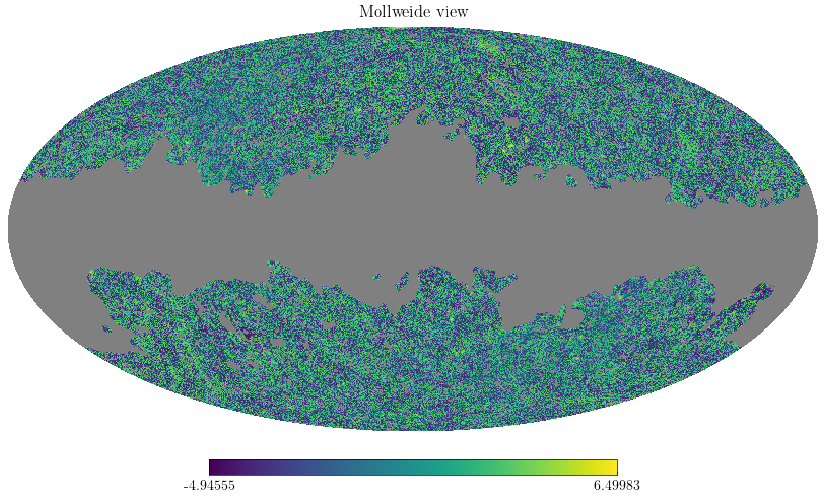

In [83]:
import healpy as hp

hp.mollview(np.asinh(cmb_tsz / 1e-7))

In [84]:
profiler2d.find_centers_observed_clusters(obs_clusters, )

Processing Abell 1644 (1/19)...
  Input: (304.878, 45.450)
  Peak:  (304.916, 45.445)
  Offset: 2.28 arcmin
Processing Abell 119 (2/19)...
  Input: (125.714, -64.062)
  Peak:  (125.305, -63.907)
  Offset: 26.24 arcmin
Processing Abell 548 (3/19)...
  Input: (230.287, -24.817)
  Peak:  (230.294, -24.471)
  Offset: 20.76 arcmin
Processing Abell 1736 (4/19)...
  Input: (312.569, 35.024)
  Peak:  (312.653, 35.027)
  Offset: 5.01 arcmin
Processing Abell 496 (5/19)...
  Input: (209.585, -36.485)
  Peak:  (209.586, -36.528)
  Offset: 2.57 arcmin
Processing Hydra (A1060) (6/19)...
  Input: (269.596, 26.488)
  Peak:  (269.531, 26.474)
  Offset: 4.00 arcmin
Processing Centaurus (A3526) (7/19)...
  Input: (302.399, 21.561)
  Peak:  (300.406, 23.862)
  Offset: 182.66 arcmin
Processing Hercules (A2199) (8/19)...
  Input: (62.931, 43.694)
  Peak:  (62.956, 43.697)
  Offset: 1.55 arcmin
Processing Hercules (A2147) (9/19)...
  Input: (28.970, 44.535)
  Peak:  (29.031, 44.517)
  Offset: 3.81 arcmin
Pro

Plotting 18/19 matched clusters
Skipping 1 unmatched: ['Shapley (A3562)']


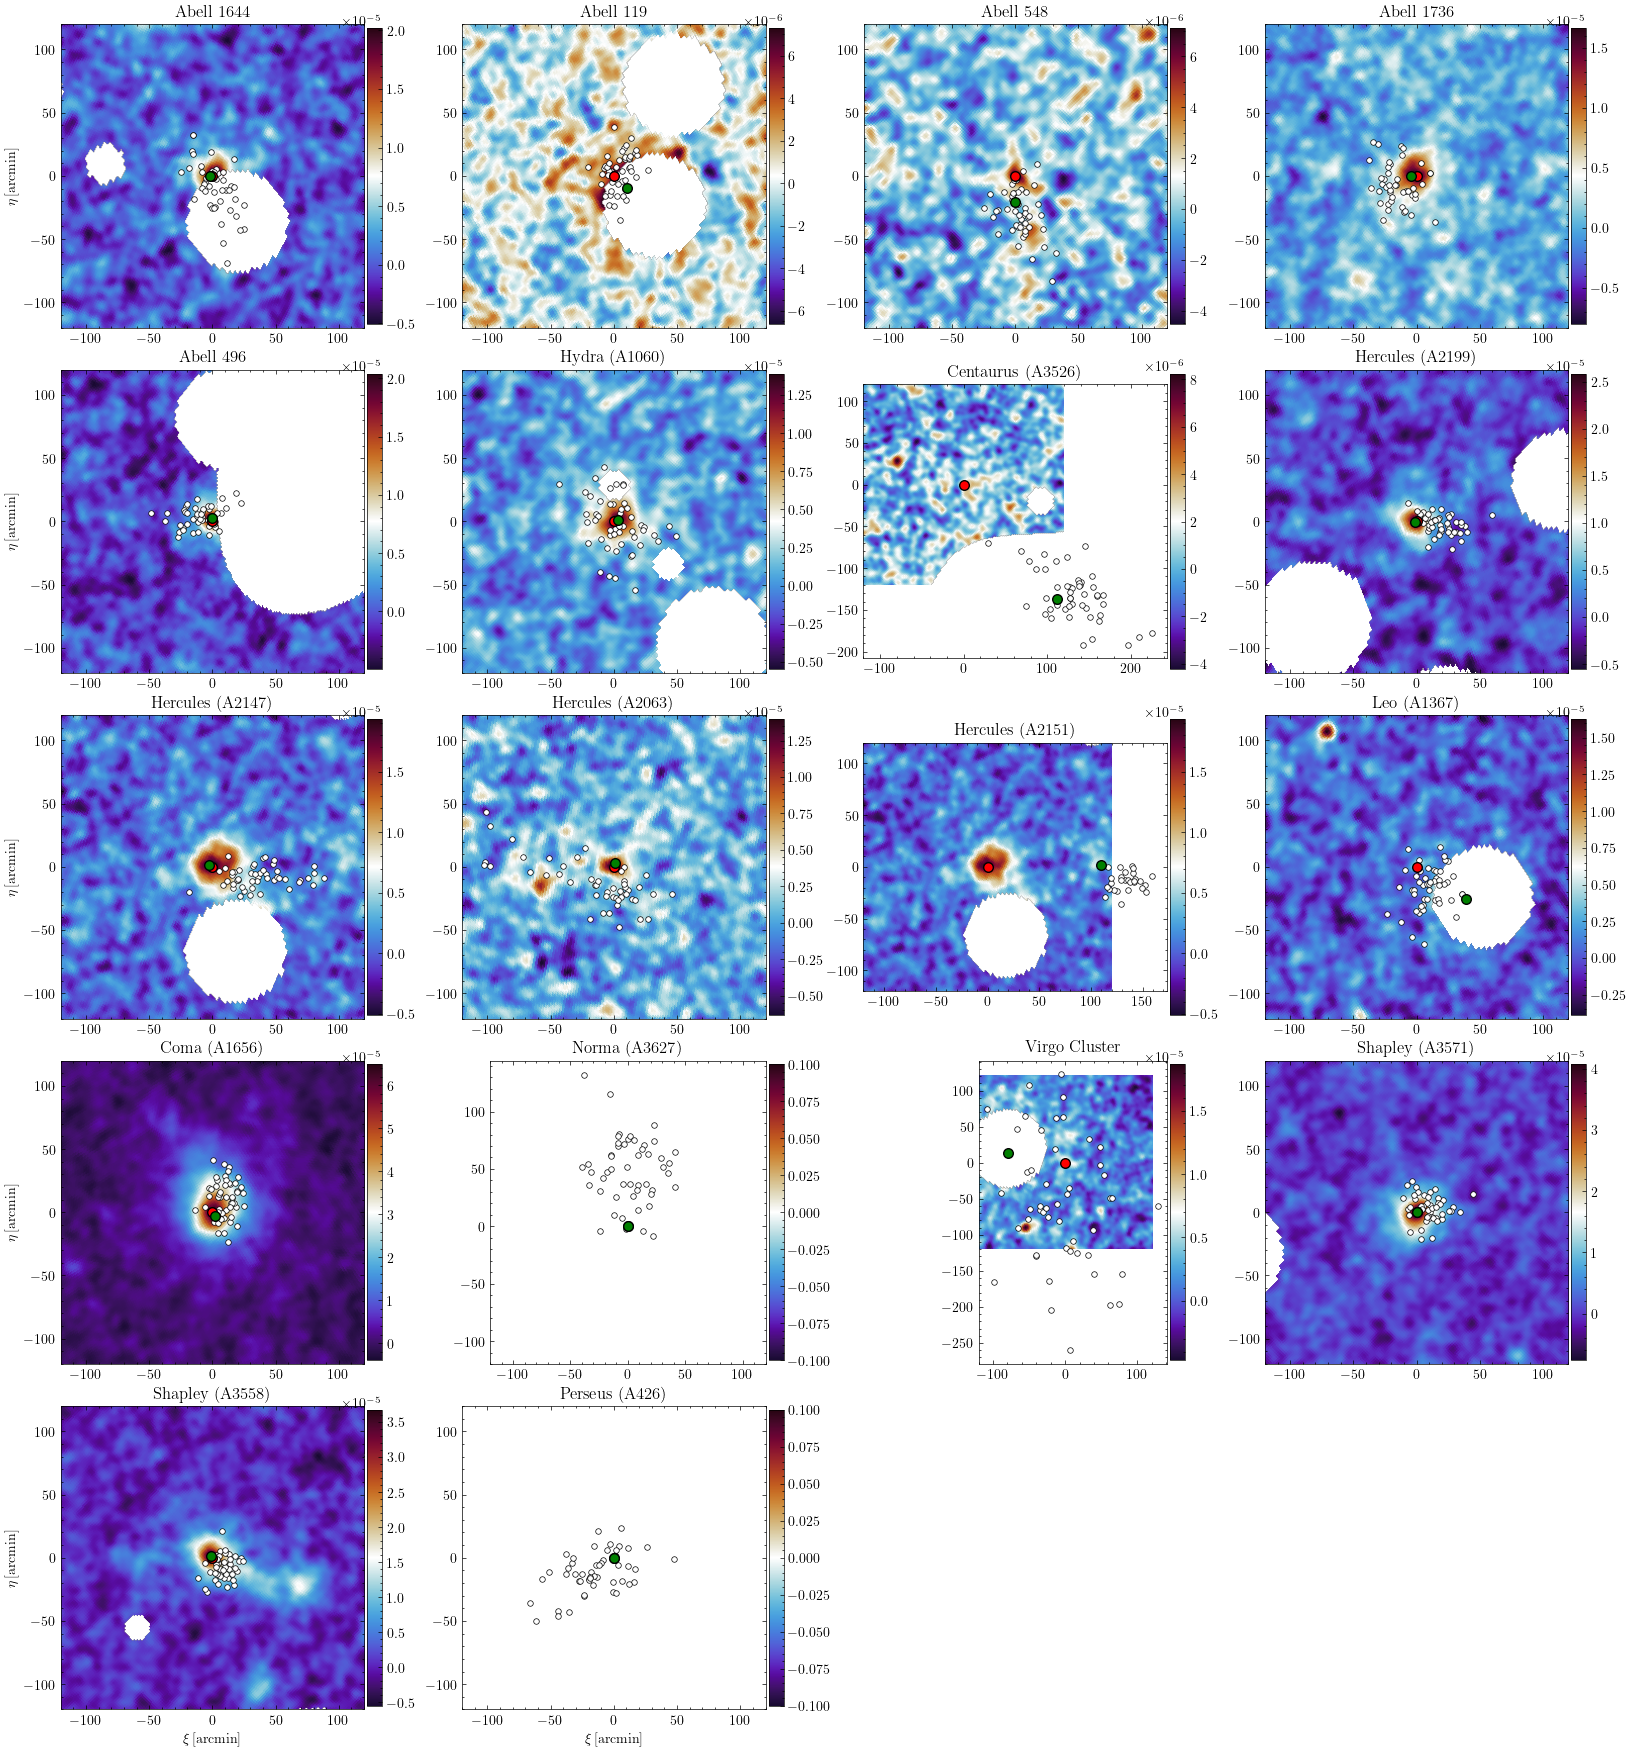

In [85]:
boxsize = boxsize_manti
matches = matches_manti

fig, ax = plot_observed_cluster_grid(obs_clusters, matches, boxsize, zoom_arcmin=None)

fig.savefig("/Users/rstiskalek/Downloads/PR4_masked_cleaned_observed_cluster_grid.png", dpi=500, bbox_inches="tight")

display(fig)

In [48]:
from astropy.io import fits

fname = "/Users/rstiskalek/Projects/CMBOlympics/data/deproject_CMB_CIB_default_standard_full.fits"

f = fits.open(fname)

In [53]:
f[0]